In [1]:
# Student ID: 1010752829
# Student name: Nargiz Guliyeva
# Instructor: Dr. Shion Gupa
# Course code:INF 2178
# Course name: Experimental Design for Data Science
# Program: MI
# Faculty of Information
# University of Toronto

# Technical Assignment 2
# Date submitted: 03.23.2024


In [2]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotnine as p9
sns.set()

import scipy.stats as stats
from scipy.stats import iqr
import statsmodels.api as sm
from scipy.stats import kstest
from statsmodels.formula.api import ols

!pip install pingouin
from pingouin import ancova



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.9/198.9 kB 1.3 MB/s eta 0:00:00


In [3]:
# Import the excel file in the coLab "Files" section and then assign it to a new variable "data"
data=pd.read_csv("INF2178_A3_data.csv")

In [4]:
data.head()

,fallreadingscore,fallmathscore,fallgeneralknowledgescore,springreadingscore,springmathscore,springgeneralknowledgescore,totalhouseholdincome,incomeinthousands,incomegroup
0,36.58,39.54,33.822,49.37,50.10,40.533,140000.0,140.0,3
1,50.82,44.44,38.147,83.50,58.93,37.409,120000.0,120.0,3
2,40.68,28.57,28.108,40.41,32.81,29.312,90000.0,90.0,3
3,32.57,23.57,15.404,34.14,35.25,27.382,50000.0,50.0,2
4,31.98,19.65,18.727,32.84,23.60,26.977,55000.0,55.0,2


In [5]:
# Explore the data with the various methods using the function 'explore data'
def explore_data(data):
    data.shape # Display shape of the DataFrame
    print(f"Data Shape: {data.shape}\n")

    # Display information about the DataFrame
    print("Data Info:")
    data.info()
    print("\n")

    # Display the number of duplicated rows
    duplicated_count = data.duplicated().sum()
    print(f"Number of Duplicated Rows: {duplicated_count}\n")

explore_data(data)

Data Shape: (11933, 9)

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11933 entries, 0 to 11932
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   fallreadingscore             11933 non-null  float64
 1   fallmathscore                11933 non-null  float64
 2   fallgeneralknowledgescore    11933 non-null  float64
 3   springreadingscore           11933 non-null  float64
 4   springmathscore              11933 non-null  float64
 5   springgeneralknowledgescore  11933 non-null  float64
 6   totalhouseholdincome         11933 non-null  float64
 7   incomeinthousands            11933 non-null  float64
 8   incomegroup                  11933 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 839.2 KB


Number of Duplicated Rows: 0



In [6]:
# Describe the dataset by determining descriptive statistics
# With.append method median and iqr values have been added to the table
data.describe(include='all').append(data.median().rename('median')).append((data.quantile(0.75) - data.quantile(0.25)).rename('iqr'))

<ipython-input-6-7f29065a00c9>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
<ipython-input-6-7f29065a00c9>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


,fallreadingscore,fallmathscore,fallgeneralknowledgescore,springreadingscore,springmathscore,springgeneralknowledgescore,totalhouseholdincome,incomeinthousands,incomegroup
count,11933.000000,11933.000000,11933.000000,11933.000000,11933.000000,11933.000000,11933.000000,11933.000000,11933.000000
mean,35.954215,27.128244,23.073694,47.511178,37.799461,28.235584,54317.199930,54.317200,1.895165
std,10.473130,9.120505,7.396978,14.327111,12.027753,7.577457,36639.061147,36.639061,0.822692
min,21.010000,10.510000,6.985000,22.350000,11.900000,7.858000,1.000000,0.001000,1.000000
25%,29.340000,20.680000,17.385000,38.950000,29.270000,22.802000,27000.000000,27.000000,1.000000
50%,34.060000,25.680000,22.954000,45.320000,36.410000,28.583000,47000.000000,47.000000,2.000000
75%,39.890000,31.590000,28.305000,51.770000,44.220000,33.782000,72000.000000,72.000000,3.000000
max,138.510000,115.650000,47.691000,156.850000,113.800000,48.345000,150000.000000,150.000000,3.000000
median,34.060000,25.680000,22.954000,45.320000,36.410000,28.583000,47000.000000,47.000000,2.000000
iqr,10.550000,10.910000,10.920000,12.820000,14.950000,10.980000,45000.000000,45.000000,2.000000


In [7]:
data.isna().sum()

fallreadingscore               0
fallmathscore                  0
fallgeneralknowledgescore      0
springreadingscore             0
springmathscore                0
springgeneralknowledgescore    0
totalhouseholdincome           0
incomeinthousands              0
incomegroup                    0
dtype: int64

### **Explarotory Data Analysis**

<ipython-input-9-398f421ab76a>:25: UserWarning: FixedFormatter should only be used together with FixedLocator


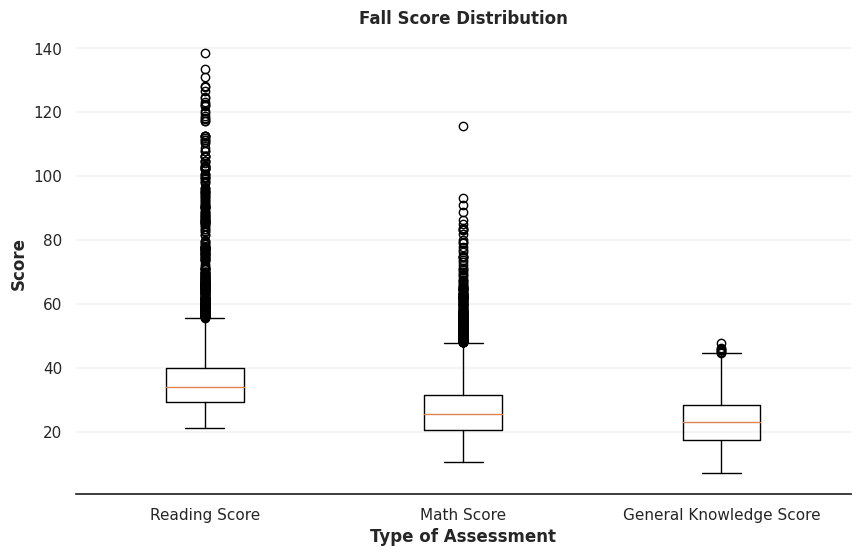

In [9]:
# Visualize the distribution of scores in fall
fig, ax = plt.subplots(figsize=(10, 6))

# Remove top and right borders for a cleaner look
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

# Set a white background for a cleaner appearance
sns.set_style("white")

# Remove y-axis tick marks for simplicity
ax.yaxis.set_ticks_position('none')

# Add major gridlines in the y-axis for reference
ax.grid(color='grey', axis='y', linestyle='-', linewidth=0.25, alpha=0.5)

# Set plot title and axis labels
ax.set_title('Fall Score Distribution', fontweight='bold')
ax.set_xlabel('Type of Assessment', fontweight='bold')
ax.set_ylabel('Score', fontweight='bold')

# Set age group names as labels for the boxplot
age_groups = ['Reading Score', 'Math Score', 'General Knowledge Score']
ax.set_xticklabels(age_groups)

# Create a boxplot for each age group
dataset = [data['fallreadingscore'], data['fallmathscore'], data['fallgeneralknowledgescore']]
ax.boxplot(dataset)

# Display the plot
plt.show()


<ipython-input-10-71dee4d9e7b6>:25: UserWarning: FixedFormatter should only be used together with FixedLocator


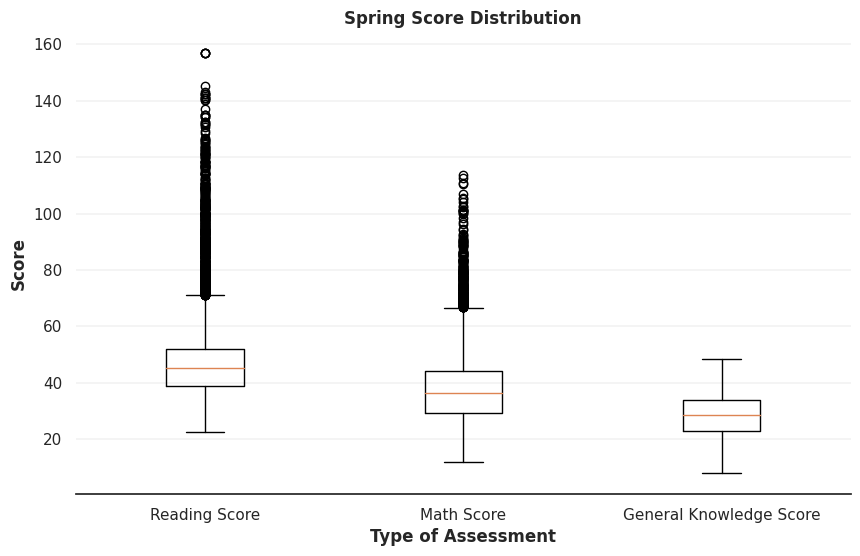

In [10]:
# Visualize the distribution of scores in spring
fig, ax = plt.subplots(figsize=(10, 6))

# Remove top and right borders for a cleaner look
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

# Set a white background for a cleaner appearance
sns.set_style("white")

# Remove y-axis tick marks for simplicity
ax.yaxis.set_ticks_position('none')

# Add major gridlines in the y-axis for reference
ax.grid(color='grey', axis='y', linestyle='-', linewidth=0.25, alpha=0.5)

# Set plot title and axis labels
ax.set_title('Spring Score Distribution', fontweight='bold')
ax.set_xlabel('Type of Assessment', fontweight='bold')
ax.set_ylabel('Score', fontweight='bold')

# Set age group names as labels for the boxplot
age_groups = ['Reading Score', 'Math Score', 'General Knowledge Score']
ax.set_xticklabels(age_groups)

# Create a boxplot for each age group
dataset = [data['springreadingscore'], data['springmathscore'], data['springgeneralknowledgescore']]
ax.boxplot(dataset)

# Display the plot
plt.show()


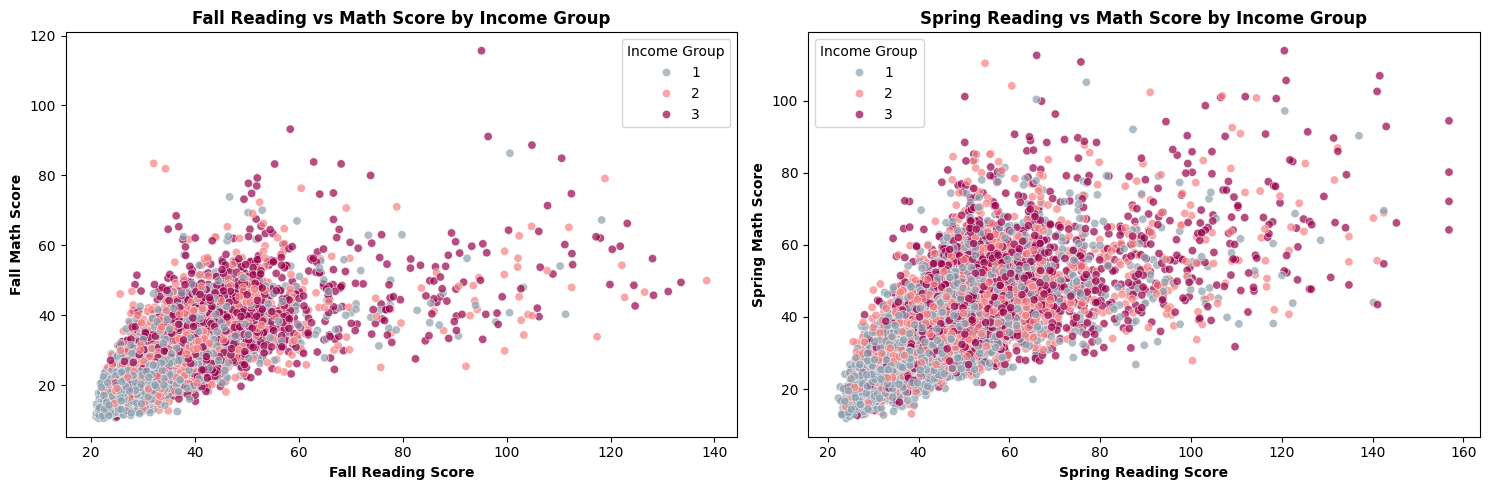

In [11]:
# Explore the relations among various subjects in spring and fall

# Set the default plot style
plt.style.use("default")

# Create a figure with a size of 15x5 inches
plt.figure(figsize=(15,5))

# Create the first subplot in a 1x2 grid
plt.subplot(1,2,1)

# Create a scatter plot for fall reading vs. math score, colored by income group
sns.scatterplot(data=data, x='fallreadingscore', y='fallmathscore', hue='incomegroup', palette=['#8da0af','#f68081','#98024c'], alpha=0.7)

# Set title and axis labels for the first subplot
plt.title('Fall Reading vs Math Score by Income Group', fontweight='bold')
plt.xlabel('Fall Reading Score', fontweight='bold')
plt.ylabel('Fall Math Score', fontweight='bold')

# Add legend with title for the first subplot
plt.legend(title='Income Group')

# Create the second subplot in a 1x2 grid
plt.subplot(1,2,2)

# Create a scatter plot for spring reading vs. math score, colored by income group
sns.scatterplot(data=data, x='springreadingscore', y='springmathscore', hue='incomegroup', palette=['#8da0af','#f68081','#98024c'], alpha=0.7)

# Set title and axis labels for the second subplot
plt.title('Spring Reading vs Math Score by Income Group', fontweight='bold')
plt.xlabel('Spring Reading Score', fontweight='bold')
plt.ylabel('Spring Math Score', fontweight='bold')

# Add legend with title for the second subplot
plt.legend(title='Income Group')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()



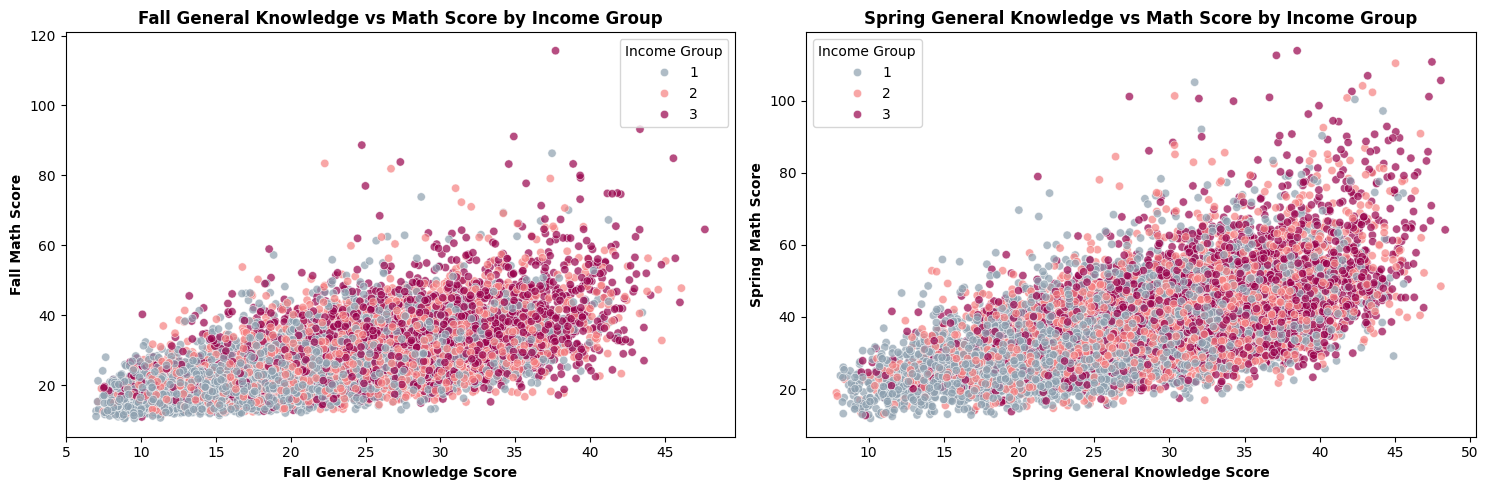

In [12]:

# Set the default plot style
plt.style.use("default")

# Create a figure with a size of 15x5 inches
plt.figure(figsize=(15,5))

# Create the first subplot in a 1x2 grid
plt.subplot(1,2,1)

# Create a scatter plot for fall general knowledge vs. math score, colored by income group
sns.scatterplot(data=data, x='fallgeneralknowledgescore', y='fallmathscore', hue='incomegroup', palette=['#8da0af','#f68081','#98024c'], alpha=0.7)

# Set title and axis labels for the first subplot
plt.title('Fall General Knowledge vs Math Score by Income Group', fontweight='bold')
plt.xlabel('Fall General Knowledge Score', fontweight='bold')
plt.ylabel('Fall Math Score', fontweight='bold')

# Add legend with title for the first subplot
plt.legend(title='Income Group')

# Create the second subplot in a 1x2 grid
plt.subplot(1,2,2)

# Create a scatter plot for spring general knowledge vs. math score, colored by income group
sns.scatterplot(data=data, x='springgeneralknowledgescore', y='springmathscore', hue='incomegroup', palette=['#8da0af','#f68081','#98024c'], alpha=0.7)

# Set title and axis labels for the second subplot
plt.title('Spring General Knowledge vs Math Score by Income Group', fontweight='bold')
plt.xlabel('Spring General Knowledge Score', fontweight='bold')
plt.ylabel('Spring Math Score', fontweight='bold')

# Add legend with title for the second subplot
plt.legend(title='Income Group')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

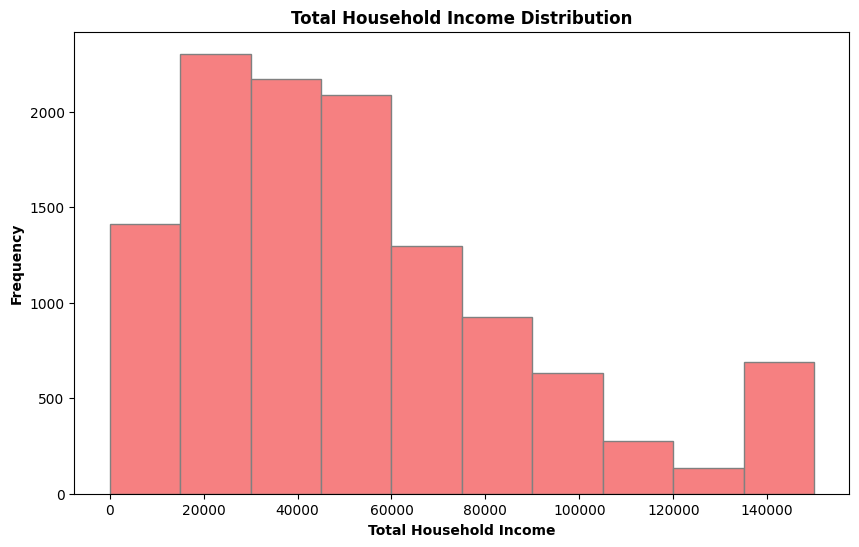

In [13]:
# Create a histogram
plt.figure(figsize=(10, 6))
plt.hist(data['totalhouseholdincome'], edgecolor='grey', color="#f68081")

# Set the labels and a title
plt.xlabel('Total Household Income',fontweight='bold')
plt.ylabel('Frequency', fontweight='bold')
plt.title('Total Household Income Distribution', fontweight='bold')

# Display
plt.show()

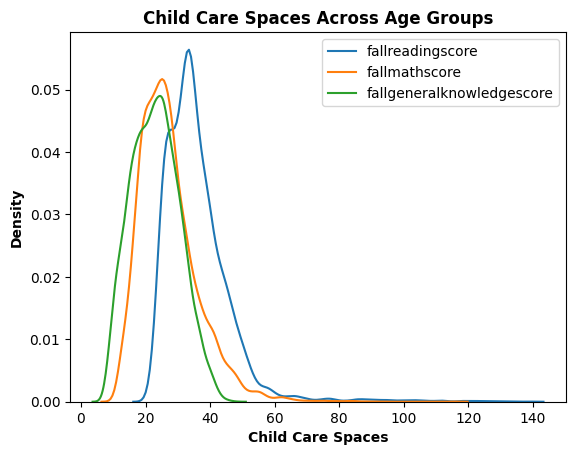

In [14]:
fig, ax = plt.subplots()

#  Kernel density estimate (KDE) plot for each column
for column in ['fallreadingscore', 'fallmathscore', 'fallgeneralknowledgescore']:
    sns.kdeplot(data[column], ax=ax, label=column)

# Add labels, title, and legends
ax.set_xlabel('Child Care Spaces', fontweight='bold')
ax.set_ylabel('Density', fontweight='bold')
ax.set_title('Child Care Spaces Across Age Groups', fontweight='bold')
ax.legend()
plt.grid(False)

# Display
plt.show()

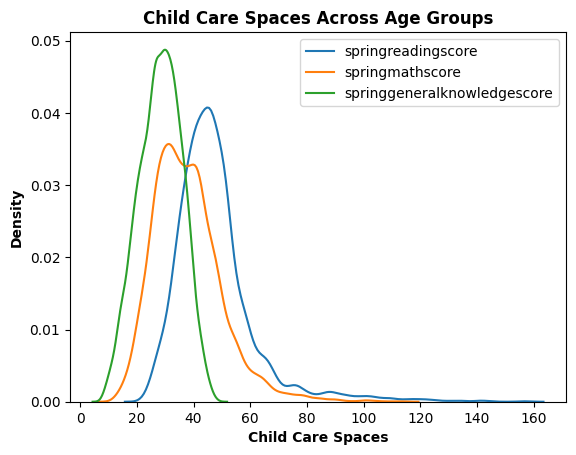

In [15]:
fig, ax = plt.subplots()

#  Kernel density estimate (KDE) plot for each column
for column in ['springreadingscore', 'springmathscore', 'springgeneralknowledgescore']:
    sns.kdeplot(data[column], ax=ax, label=column)

# Add labels, title, and legends
ax.set_xlabel('Child Care Spaces', fontweight='bold')
ax.set_ylabel('Density', fontweight='bold')
ax.set_title('Child Care Spaces Across Age Groups', fontweight='bold')
ax.legend()

plt.grid(False)
# Display
plt.show()

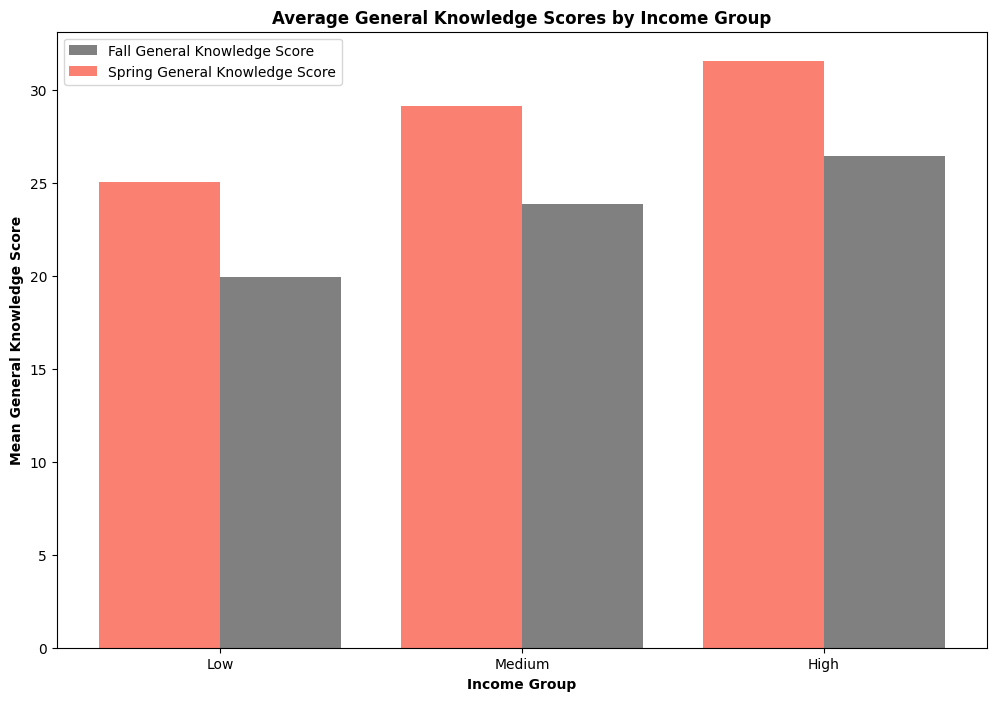

In [16]:

# Group data by incomegroup and calculate mean scores
mean_scores = data.groupby('incomegroup')[['fallgeneralknowledgescore', 'springgeneralknowledgescore']].mean()

# Plotting the bar plot
plt.figure(figsize=(12, 8))

# Plot fall general knowledge scores
plt.bar(mean_scores.index + 0.2, mean_scores['fallgeneralknowledgescore'], width=0.4, color='grey', label='Fall General Knowledge Score')

# Plot spring general knowledge scores
plt.bar(mean_scores.index - 0.2, mean_scores['springgeneralknowledgescore'], width=0.4, color='salmon', label='Spring General Knowledge Score')



# Adding labels and title
plt.title('Average General Knowledge Scores by Income Group', fontweight='bold')
plt.xlabel('Income Group', fontweight='bold')
plt.ylabel('Mean General Knowledge Score', fontweight='bold')
plt.xticks(mean_scores.index, ['Low', 'Medium', 'High'])  # Assuming 1, 2, 3 correspond to 'Low', 'Medium', 'High'

# Adding legend
plt.legend()

plt.grid(False)

# Show plot
plt.show()


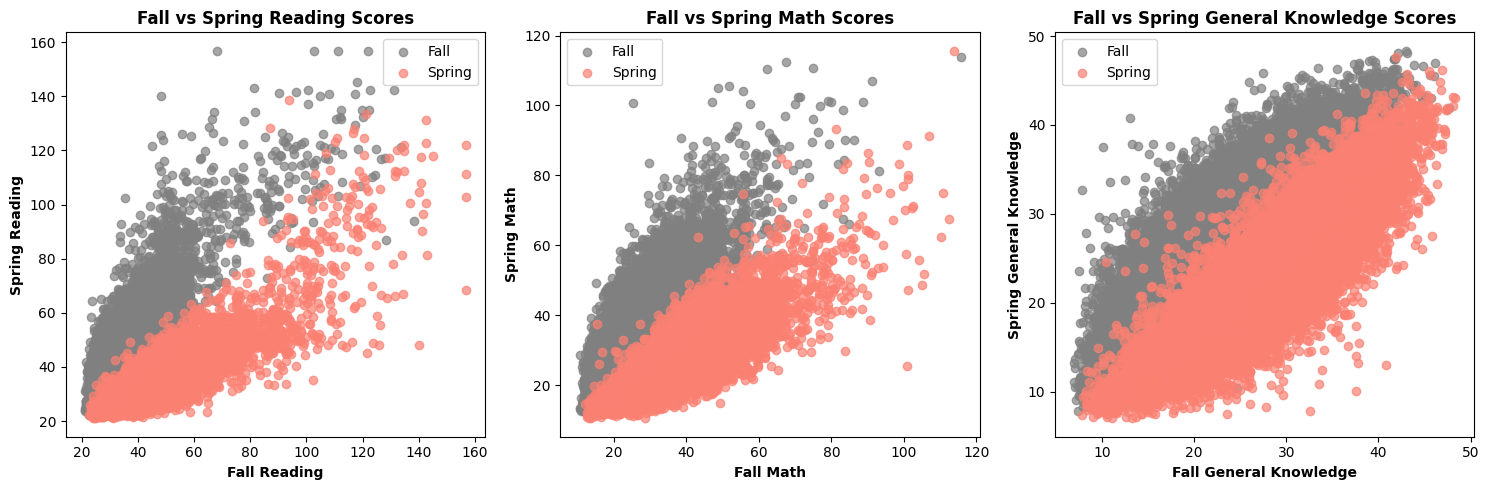

In [17]:
# Extracting fall and spring scores for reading, math, and general knowledge
fall_reading_score = data['fallreadingscore']
spring_reading_score = data['springreadingscore']

fall_math_score = data['fallmathscore']
spring_math_score = data['springmathscore']

fall_general_knowledge_score = data['fallgeneralknowledgescore']
spring_general_knowledge_score = data['springgeneralknowledgescore']

# Plotting scatter plots
plt.figure(figsize=(15, 5))

# Scatter plot for reading scores
plt.subplot(1, 3, 1)
plt.scatter(fall_reading_score, spring_reading_score, color='grey', alpha=0.7, label='Fall')
plt.scatter(spring_reading_score, fall_reading_score, color='salmon', alpha=0.7, label='Spring')
plt.title('Fall vs Spring Reading Scores', fontweight='bold')
plt.xlabel('Fall Reading', fontweight='bold')
plt.ylabel('Spring Reading', fontweight='bold')
plt.legend()
plt.grid(False)

# Scatter plot for math scores
plt.subplot(1, 3, 2)
plt.scatter(fall_math_score, spring_math_score, color='grey', alpha=0.7, label='Fall')
plt.scatter(spring_math_score, fall_math_score, color='salmon', alpha=0.7, label='Spring')
plt.title('Fall vs Spring Math Scores', fontweight='bold')
plt.xlabel('Fall Math', fontweight='bold')
plt.ylabel('Spring Math', fontweight='bold')
plt.legend()
plt.grid(False)

# Scatter plot for general knowledge scores
plt.subplot(1, 3, 3)
plt.scatter(fall_general_knowledge_score, spring_general_knowledge_score, color='grey', alpha=0.7, label='Fall')
plt.scatter(spring_general_knowledge_score, fall_general_knowledge_score, color='salmon', alpha=0.7, label='Spring')
plt.title('Fall vs Spring General Knowledge Scores', fontweight='bold')
plt.xlabel('Fall General Knowledge', fontweight='bold')
plt.ylabel('Spring General Knowledge', fontweight='bold')
plt.legend()
plt.grid(False)

# Adjust layout
plt.tight_layout()


# Show plots
plt.show()


**ANCOVA**

**Research** **question 1**: Does income group significantly predict differences in spring general knowledge scores among kindergarten students after controlling for baseline reading and math abilities?

**Null Hypothesis (H0)**: There is no significant difference in spring general knowledge scores among kindergarten students across different income groups after controlling for baseline reading and math abilities.

**Alternative Hypothesis (H1)**: There is a significant difference in spring general knowledge scores among kindergarten students across different income groups after controlling for baseline reading and math abilities.


In [18]:
# Perform ANCOVA
result_springgk = ancova(data=data, dv='springgeneralknowledgescore',
                covar=['springreadingscore', 'springmathscore'], between='incomegroup')

# Print ANCOVA results
result_springgk

,Source,SS,DF,F,p-unc,np2
0,incomegroup,24052.286452,2,356.127799,5.989956e-151,0.056348
1,springreadingscore,2726.939252,1,80.752312,2.941348e-19,0.006724
2,springmathscore,89622.123578,1,2653.962204,0.000000e+00,0.182003
3,Residual,402798.761908,11928,NaN,NaN,NaN


In [19]:
# Define the design matrix
X = sm.add_constant(data[['springreadingscore', 'springmathscore', 'incomegroup']])

# Fit the OLS regression model
ancova_model_ols = sm.OLS(data['springgeneralknowledgescore'], X).fit()

# Print the summary of the model
print(ancova_model_ols.summary())


                                 OLS Regression Results                                
Dep. Variable:     springgeneralknowledgescore   R-squared:                       0.410
Model:                                     OLS   Adj. R-squared:                  0.410
Method:                          Least Squares   F-statistic:                     2765.
Date:                         Sun, 24 Mar 2024   Prob (F-statistic):               0.00
Time:                                 03:34:43   Log-Likelihood:                -37949.
No. Observations:                        11933   AIC:                         7.591e+04
Df Residuals:                            11929   BIC:                         7.593e+04
Df Model:                                    3                                         
Covariance Type:                     nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------

/usr/local/lib/python3.10/dist-packages/seaborn/regression.py:598: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.


<Figure size 1000x600 with 0 Axes>

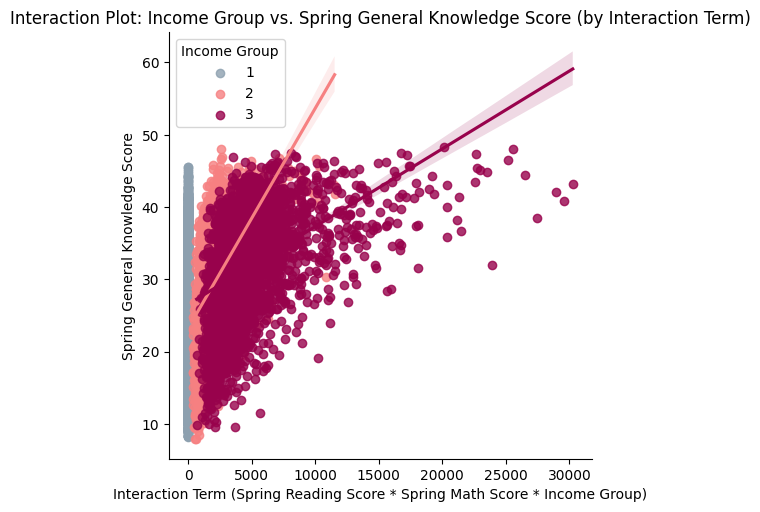

In [25]:


# Convert 'incomegroup' to categorical type
data['incomegroup'] = pd.Categorical(data['incomegroup'])


# Calculate interaction term manually
data['interaction'] = data['springreadingscore'] * data['springmathscore'] * data['incomegroup'].cat.codes

# Plot interaction between income group and interaction term
plt.figure(figsize=(10, 6))
plt.style.use("default")
sns.lmplot(x='interaction', y='springgeneralknowledgescore', hue='incomegroup', data=data, legend_out=False, palette=['#8da0af', '#f68081', '#98024c'])
plt.title('Interaction Plot: Income Group vs. Spring General Knowledge Score (by Interaction Term)')
plt.xlabel('Interaction Term (Spring Reading Score * Spring Math Score * Income Group)')
plt.ylabel('Spring General Knowledge Score')
plt.legend(title='Income Group')
plt.show()



In [26]:
# Convert 'incomegroup' to categorical type
data['incomegroup'] = pd.Categorical(data['incomegroup'])

# Fit ANCOVA model
result_springgk = sm.OLS.from_formula('springgeneralknowledgescore ~ springreadingscore + springmathscore + C(incomegroup)', data=data).fit()

# Calculate interaction term manually
data['interaction'] = data['springreadingscore'] * data['springmathscore'] * data['incomegroup'].cat.codes

# Print ANCOVA results
print(result_springgk.summary())


                                 OLS Regression Results                                
Dep. Variable:     springgeneralknowledgescore   R-squared:                       0.412
Model:                                     OLS   Adj. R-squared:                  0.412
Method:                          Least Squares   F-statistic:                     2090.
Date:                         Sun, 24 Mar 2024   Prob (F-statistic):               0.00
Time:                                 03:36:57   Log-Likelihood:                -37929.
No. Observations:                        11933   AIC:                         7.587e+04
Df Residuals:                            11928   BIC:                         7.591e+04
Df Model:                                    4                                         
Covariance Type:                     nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------

**Assumption**

In [28]:
# Assumptions of normality

# Fit ANCOVA model
X = sm.add_constant(data[['springreadingscore', 'springmathscore']])  # Adding constant term
ancova_model = sm.OLS(data['springgeneralknowledgescore'], X).fit()

# Get the predicted values from the ANCOVA model
predicted_values = ancova_model.predict(X)

# Compute residuals by subtracting predicted values from observed values
residuals = data['springgeneralknowledgescore'] - predicted_values

# Perform Shapiro-Wilk test for normality
shapiro_test_statistic, shapiro_p_value = shapiro(residuals)

# Print the test statistic and p-value
print("Shapiro-Wilk test statistic:", shapiro_test_statistic)
print("p-value:", shapiro_p_value)

#NOTE: The code says  p-value may not be accurate for N > 5000. Consider another test


Shapiro-Wilk test statistic: 0.9980759024620056
p-value: 4.413171217354517e-11


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.


In [29]:
# Assumptions of normality
# NOTE: Used instead of Shapiro-Wilk test because the number of cases 11,933

# Fit ANCOVA model
X = sm.add_constant(data[['springreadingscore', 'springmathscore']])  # Adding constant term
ancova_model = sm.OLS(data['springgeneralknowledgescore'], X).fit()

# Get the predicted values from the ANCOVA model
predicted_values = ancova_model.predict(X)

# Compute residuals by subtracting predicted values from observed values
residuals = data['springgeneralknowledgescore'] - predicted_values

# Perform Kolmogorov-Smirnov test for normality
ks_test_statistic, ks_p_value = kstest(residuals, 'norm')

# Print the test statistic and p-value
print("Kolmogorov-Smirnov test statistic:", ks_test_statistic)
print("p-value:", ks_p_value)


Kolmogorov-Smirnov test statistic: 0.3588503396416566
p-value: 0.0


In [31]:
# Assumptions of homogeneity of variances

# Fit ANCOVA model
X = sm.add_constant(data[['springreadingscore', 'springmathscore']])
ancova_model = sm.OLS(data['springgeneralknowledgescore'], X).fit()

# Compute residuals by subtracting predicted values from observed values
residuals = ancova_model.resid

# Group residuals by 'incomegroup'
grouped_residuals = [residuals[data['incomegroup'] == group] for group in data['incomegroup'].unique()]

# Perform Bartlett test for homogeneity of variances
bartlett_statistic, bartlett_p_value = stats.bartlett(*grouped_residuals)

# Print Bartlett test results
print("Bartlett test statistic:", bartlett_statistic)
print("p-value:", bartlett_p_value)



Bartlett test statistic: 2.100744557954491
p-value: 0.3498074988900305


**ANCOVA**

**Research Question 2:** Does income group predict spring math scores while controlling for baseline fall math scores?

**Null Hypothesis (H0):** There is no significant difference in spring math scores among income groups after controlling for baseline fall math scores.

**Alternative Hypothesis (H1):** There is a significant difference in spring math scores among income groups after controlling for baseline fall math scores.

In [32]:
# Fit ANCOVA model with interaction term
model_interaction = sm.formula.ols('springmathscore ~ incomegroup * fallmathscore', data=data).fit()

# Print model summary
print(model_interaction.summary())

                            OLS Regression Results                            
Dep. Variable:        springmathscore   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.681
Method:                 Least Squares   F-statistic:                     5103.
Date:                Sun, 24 Mar 2024   Prob (F-statistic):               0.00
Time:                        03:37:24   Log-Likelihood:                -39786.
No. Observations:               11933   AIC:                         7.958e+04
Df Residuals:                   11927   BIC:                         7.963e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

/usr/local/lib/python3.10/dist-packages/seaborn/regression.py:598: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.


<Figure size 1000x600 with 0 Axes>

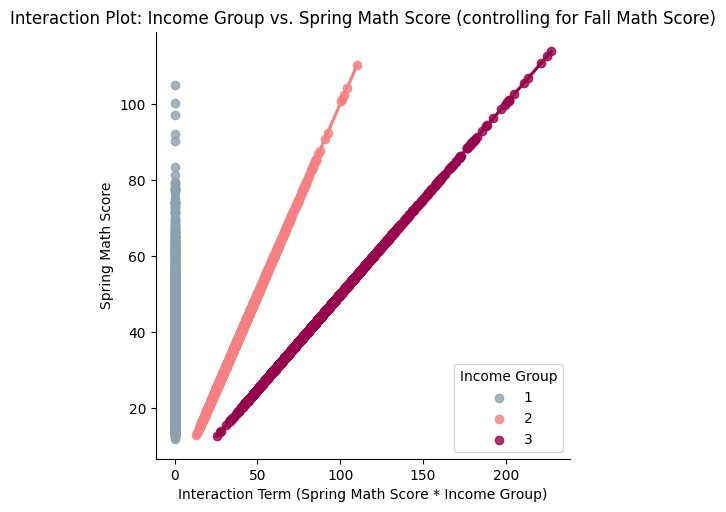

In [33]:
# Fit ANCOVA model with both income group and fall math scores as predictors
model = sm.formula.ols('springmathscore ~ incomegroup + fallmathscore', data=data).fit()
plt.style.use("default")

# Calculate interaction term manually
data['interaction'] = data['springmathscore'] * data['incomegroup'].cat.codes

# Plot interaction between income group and spring math score, controlling for fall math scores
plt.figure(figsize=(10, 6))
sns.lmplot(x='interaction', y='springmathscore', hue='incomegroup', data=data, legend_out=False, palette=['#8da0af', '#f68081', '#98024c'], robust=True, ci=None)
plt.title('Interaction Plot: Income Group vs. Spring Math Score (controlling for Fall Math Score)')
plt.xlabel('Interaction Term (Spring Math Score * Income Group)')
plt.ylabel('Spring Math Score')
plt.legend(title='Income Group')
plt.show()

In [34]:
#Assumtion of Normality
# Get residuals from the model
residuals = model_interaction.resid

# Perform Kolmogorov-Smirnov test for normality
kstest_statistic, kstest_p_value = stats.kstest(residuals, 'norm')

# Print the test statistic and p-value
print("Kolmogorov-Smirnov test statistic:", kstest_statistic)
print("p-value:", kstest_p_value)


Kolmogorov-Smirnov test statistic: 0.3892435359616416
p-value: 0.0


In [35]:
# Assumption of homogeneity

# Fit ANCOVA model
model = sm.formula.ols('springmathscore ~ incomegroup + fallmathscore', data=data).fit()

# Compute residuals
residuals = model.resid

# Group residuals by 'incomegroup'
grouped_residuals = [residuals[data['incomegroup'] == group] for group in data['incomegroup'].unique()]

# Perform Bartlett test for homogeneity of variances
bartlett_statistic, bartlett_p_value = stats.bartlett(*grouped_residuals)

# Print Bartlett test results
print("Bartlett test statistic:", bartlett_statistic)
print("p-value:", bartlett_p_value)

Bartlett test statistic: 87.65921454537256
p-value: 9.226636634960654e-20


Reference:

1. ANCOVA using R and Python (with examples and code), Retrived from https://www.reneshbedre.com/blog/ancova.html

2. Mohd Razali, N. (2009). Test of normality: a power comparison of Kolmogorov-Smirnov, Anderson-Darling, Shapiro-Wilk and Lilliefors tests (Doctoral dissertation, Universiti Teknologi MARA).